<a href="https://colab.research.google.com/github/thasniyamansoora/Myy_projects/blob/main/Python_project_entri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###THASNIYA MANSOORA

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1.How many are there in each Team and the percentage splitting with respect to the total employees.

2.Segregate the employees w.r.t different positions.

3.Find from which age group most of the employees belong to.

4.Find out under which team and position, spending in terms of salary is high.

5.Find if there is any correlation between age and salary , represent it visually.


Before doing the above questions, perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
# Reading the xlsx file from the drive
df = pd.read_excel('/content/drive/MyDrive/myexcel.xlsx')

In [ ]:
# Dataset First Look
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [ ]:
# Dataset Columns
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,458,458,Avery Bradley,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,458,30,New Orleans Pelicans,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number,458.0,NaN,NaN,NaN,17.713974,15.966837,0.0,5.0,13.0,25.0,99.0
Position,458,5,SG,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,458.0,NaN,NaN,NaN,26.934498,4.400128,19.0,24.0,26.0,30.0,40.0
Height,458,18,2023-09-06 00:00:00,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,458.0,NaN,NaN,NaN,221.543668,26.3432,161.0,200.0,220.0,240.0,307.0
College,374,118,Kentucky,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,447.0,NaN,NaN,NaN,4833969.545861,5226620.431854,30888.0,1025210.5,2836186.0,6500000.0,25000000.0


In [ ]:
# Dataset Rows & Columns count
df.shape

(458, 9)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [ ]:
# Replace incorrect data in the 'height' column with random numbers between 150 and 180
df['height'] = np.random.randint(150, 181, size=len(df))

# Print the first few rows to verify the changes
print(df.head())

            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  height  
0     180              Texas  7730337.0     179  
1     235          Marquette  6796117.0     172  
2     205  Boston University        NaN     173  
3     185      Georgia State  1148640.0     155  
4     231                NaN  5000000.0     169  


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [ ]:
#Droping rows with null values in entire row
df.dropna(how='all',inplace=True)

In [ ]:
# Dataset Duplicate Value Count
value = len(df[df.duplicated()])
value

0

In [ ]:
# Check Unique Values for each variable.
n = df.nunique(axis=0)

print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 Name        458
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       87
College     118
Salary      309
height       31
dtype: int64



##1.How many are there in each Team and the percentage splitting with respect to the total employees.


In [ ]:
team_counts = df.groupby('Team')['Name'].count().reset_index()
total_employees = df['Name'].count()
team_counts['Percentage'] = (team_counts['Name'] / total_employees) * 100
print(team_counts)

                      Team  Name  Percentage
0            Atlanta Hawks    15    3.275109
1           Boston Celtics    15    3.275109
2            Brooklyn Nets    15    3.275109
3        Charlotte Hornets    15    3.275109
4            Chicago Bulls    15    3.275109
5      Cleveland Cavaliers    15    3.275109
6         Dallas Mavericks    15    3.275109
7           Denver Nuggets    15    3.275109
8          Detroit Pistons    15    3.275109
9    Golden State Warriors    15    3.275109
10         Houston Rockets    15    3.275109
11          Indiana Pacers    15    3.275109
12    Los Angeles Clippers    15    3.275109
13      Los Angeles Lakers    15    3.275109
14       Memphis Grizzlies    18    3.930131
15              Miami Heat    15    3.275109
16         Milwaukee Bucks    16    3.493450
17  Minnesota Timberwolves    14    3.056769
18    New Orleans Pelicans    19    4.148472
19         New York Knicks    16    3.493450
20   Oklahoma City Thunder    15    3.275109
21        

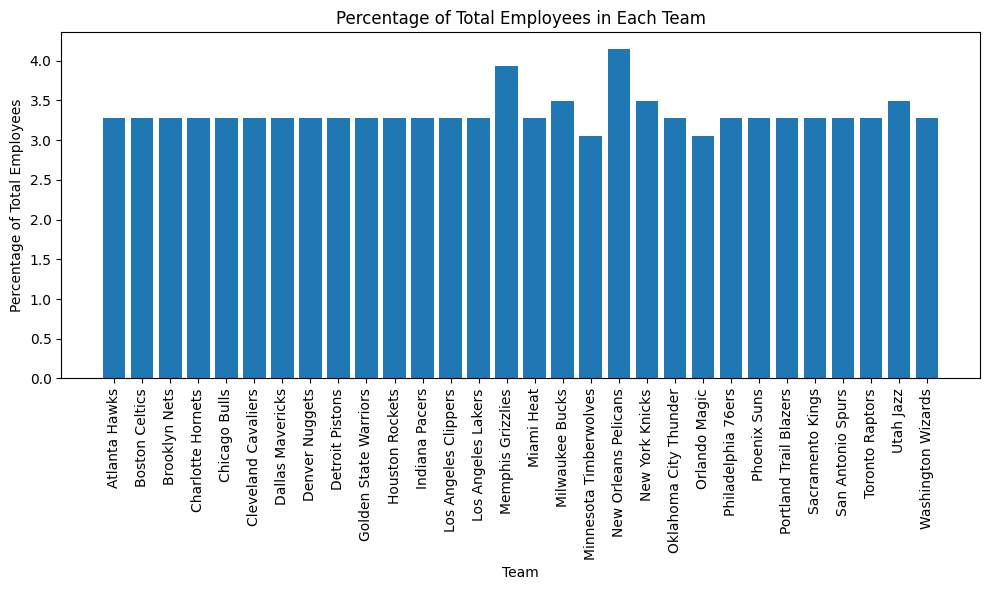

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(team_counts['Team'], team_counts['Percentage'])
plt.xlabel('Team')
plt.ylabel('Percentage of Total Employees')
plt.title('Percentage of Total Employees in Each Team')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

New Orleans Pelicans team shows the highest percentage of players   4.148472 %
while all other teams have almost the same percentage of players which is less than 4%

2.Segregate the employees w.r.t different positions.

In [ ]:
position_groups = df.groupby('Position')
# You can also count the number of employees in each position
position_counts = position_groups.size().reset_index()
position_counts.columns = ['Position', 'Number']

# Display the number of employees in each position
print(position_counts)


  Position  Number
0        C      79
1       PF     100
2       PG      92
3       SF      85
4       SG     102


In [ ]:
df.Position.value_counts()

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

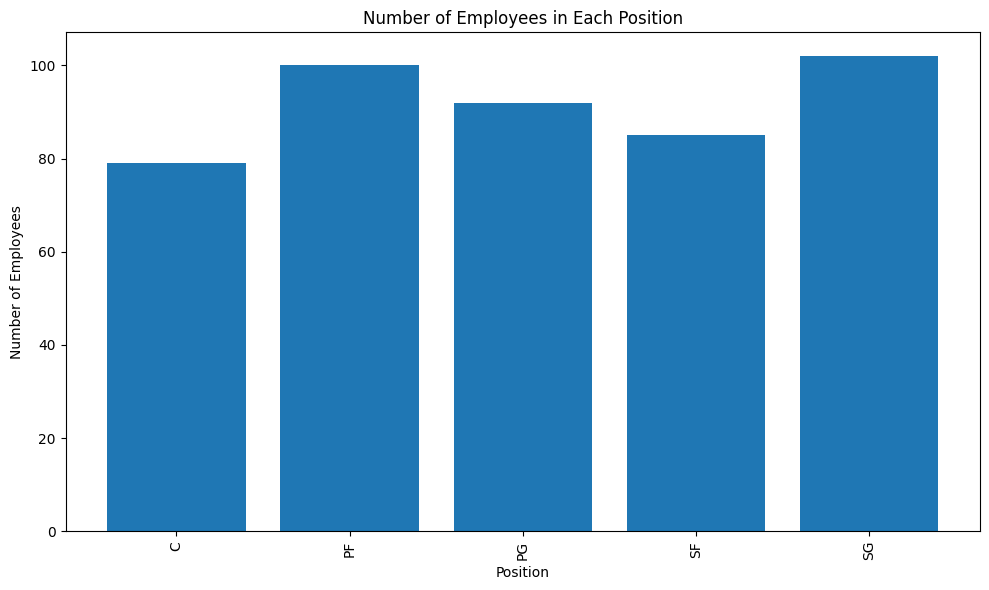

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(position_counts['Position'], position_counts['Number'])
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Position')

# Optionally, you can rotate the x-axis labels for better readability if there are many positions
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

position SG and CF has more number of employees 102 and 100 respectively .
while the least number of employees is in the position c which is 79

##3.Find from which age group most of the employees belong to.

In [ ]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

# Categorize employees into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_counts = df['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Number']

# Find the age group with the most employees
most_common_age_group = age_group_counts.iloc[0]['Age Group']

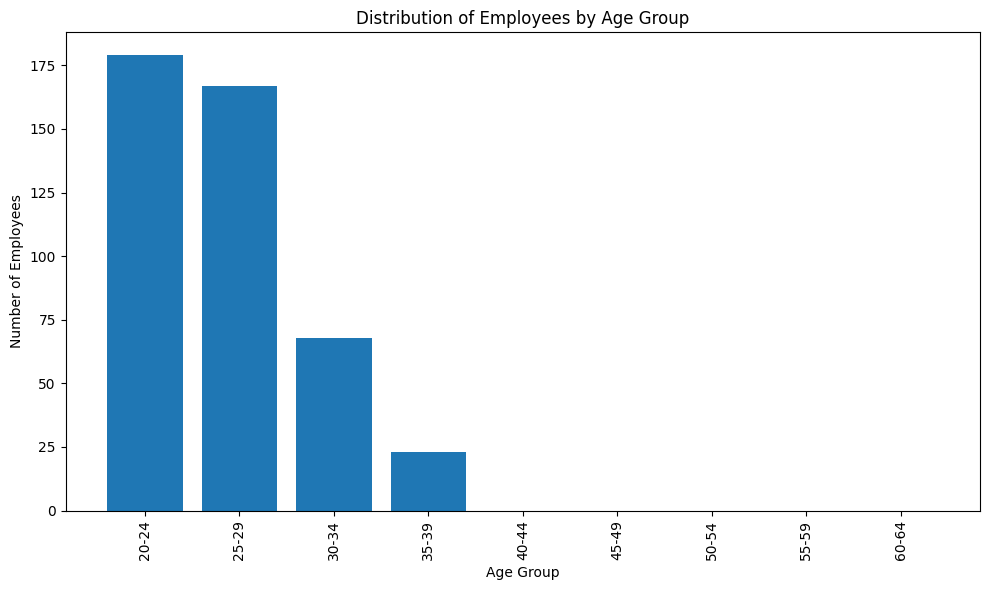

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts['Age Group'], age_group_counts['Number'])
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Age Group')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

More number of employees are in the age group of 20-24 , while least number of employees are in the age group of 35-39. There are no employees who are above 40 years of age.

##4.Find out under which team and position, spending in terms of salary is high.

In [ ]:
# Assuming you have a DataFrame named 'data' with 'Team', 'Position', and 'Salary' columns
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

In [ ]:
highest_spending_combo = team_position_salary.loc[team_position_salary['Salary'].idxmax()]
print(f"The highest spending is in Team: {highest_spending_combo['Team']} and Position: {highest_spending_combo['Position']} with a total salary spending of ${highest_spending_combo['Salary']}")

The highest spending is in Team: Los Angeles Lakers and Position: SF with a total salary spending of $31866445.0


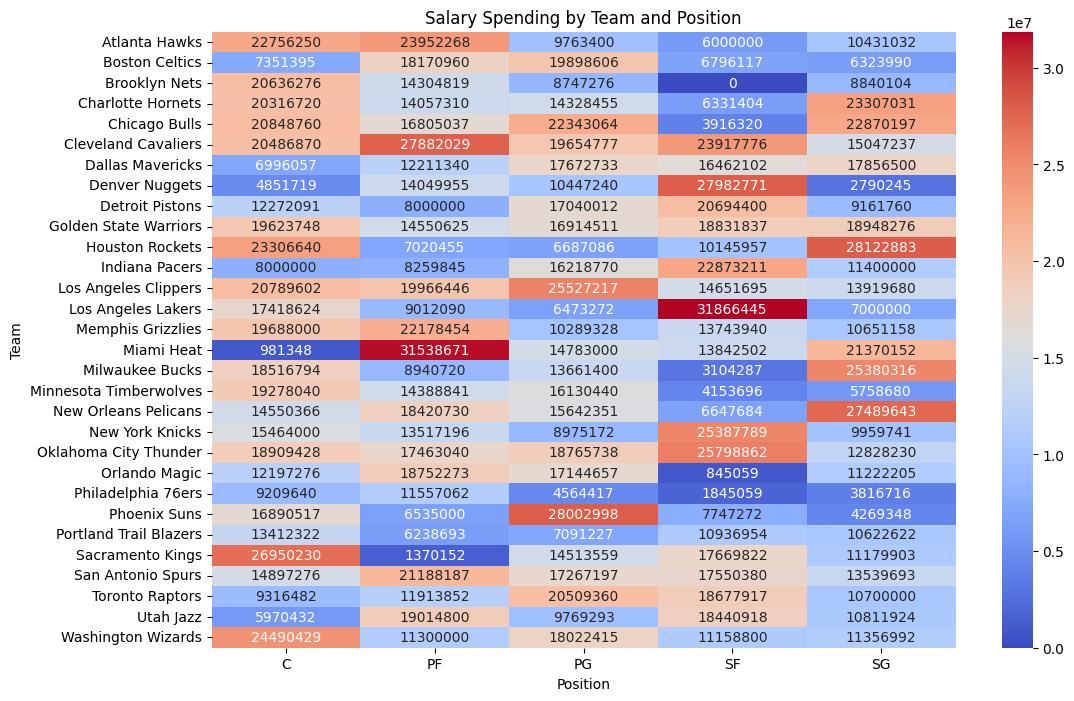

In [ ]:
pivot_table = team_position_salary.pivot_table(index='Team', columns='Position', values='Salary', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Salary Spending by Team and Position')
plt.xlabel('Position')
plt.ylabel('Team')
plt.show()

The highest salary is given to team Los Angeles Lakers in the position SF, Which is 31866445.
The  second highest salary is given to team Miami Heat in the position PF, Which is 31538671.


##5.Find if there is any correlation between age and salary , represent it visually.

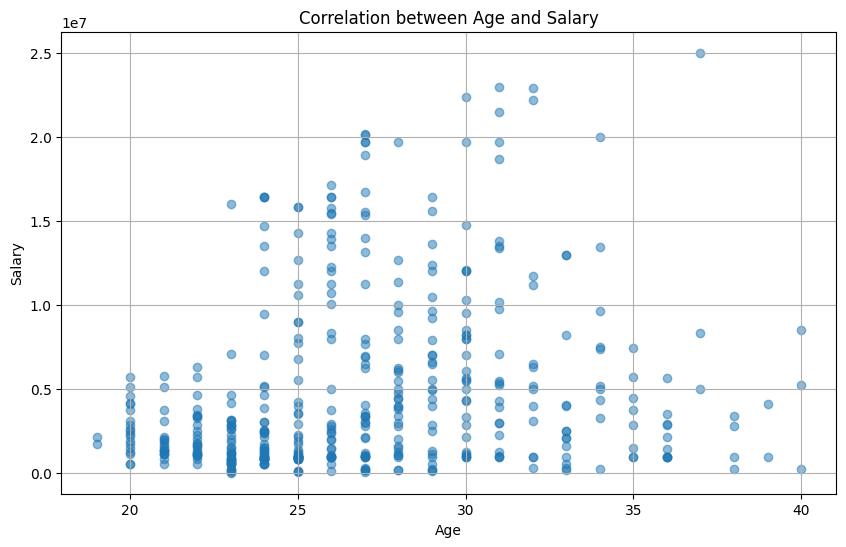

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlation between Age and Salary')
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient = df['Age'].corr(df['Salary'])
print(f"Correlation coefficient between Age and Salary: {correlation_coefficient}")

Correlation coefficient between Age and Salary: 0.21400941226570971


There is no correlation between age and salary

##Conclusions



*   New Orleans Pelicans team shows the highest percentage of players   4.148472 %
while all other teams have almost the same percentage of players which is less than 4%
*   position SG and CF has more number of employees 102 and 100 respectively .
while the least number of employees is in the position c which is 79

*   More number of employees are in the age group of 20-24 , while least number of employees are in the age group of 35-39. There are no employees who are above 40 years of age.
*   
The highest salary is given to team Los Angeles Lakers in the position SF, Which is 31866445. The second highest salary is given to team Miami Heat in the position PF, Which is 31538671.

*   There is no correlation between age and salary.The correlartion coeficient is 0.21






